In [1]:
import pandas as pd
import re
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import string
import sklearn.metrics
import seaborn as sns
from statannot import add_stat_annotation
import scipy.stats as sts
import math
from sklearn.model_selection import ShuffleSplit
import plotly.express as px
import statistics
from standardize_format import standardized_maxquant_msms, standardized_Michi_psm, prepare_phi_vali_AutoRT,prepare_MQ_vali_AutoRT
from standardize_format import convert_to_psmtxt

In [6]:
#PXD015284

In [2]:
#PXD015284 MaxQuant results
data_PXD015284 = pd.read_csv('../data/PXD015284/MaxQuant_results/msms.txt',sep='\t',index_col=0)
data_PXD015284 = data_PXD015284[data_PXD015284['Reverse']!='+']
#standardized maxquant
data_PXD015284=standardized_maxquant_msms(data_PXD015284)
data_PXD015284_T=data_PXD015284[data_PXD015284.Acceptance=='y']
#PXD015284 FragPipe results, more than MaxQuant
phi_data_PXD015284 = pd.read_csv('../data/PXD015284/Michigan_fixed_parameters/psm_nTMTfixed.tsv',sep='\t')
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#FragPipe
#site prob filter (0.75)
#phosphopep only
phi_data_PXD015284=standardized_Michi_psm(phi_data_PXD015284)
phi_data_PXD015284_T=phi_data_PXD015284[phi_data_PXD015284['Acceptance']=='y']

/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (42,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#exp+scan+phosphopep
maxquant_zipped_PXD015284=list(zip(data_PXD015284_T.index.tolist(),data_PXD015284_T['scan'].tolist(),data_PXD015284_T['phosphopep'].tolist()))
Michi_zipped_PXD015284=list(zip(phi_data_PXD015284_T.index.tolist(),[int(i) for i in phi_data_PXD015284_T.scan.tolist()],phi_data_PXD015284_T.phosphopep.tolist()))

<ipython-input-4-203aecb8ae18>:33: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5c_PXD015284_unlocalized_proportion.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


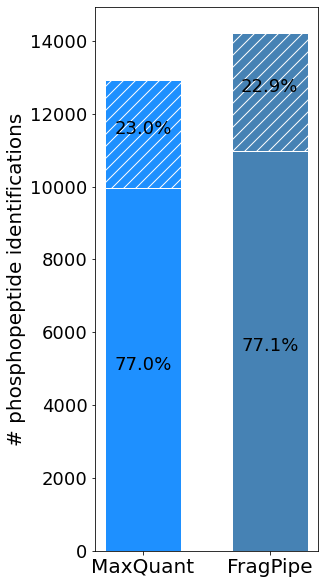

In [4]:
#Figure5c
pep=[len(set(data_PXD015284_T.phosphopep)),len(set(data_PXD015284.phosphopep)),
     len(set(phi_data_PXD015284_T.phosphopep)),len(set(phi_data_PXD015284.phosphopep))]
# Values of each group
bars1 = [pep[1]-pep[0],pep[3]-pep[2]]
bars2 = [pep[0],pep[2]]
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,2.5]
r1 = [1,3]
r2 = [2,4]

plt.figure(1, figsize=(4,10))
#ax = plt.axes([0.1, 0.1, 4.2, 8],facecolor='w')

# Names of group and bar width
names = ['MaxQuant','FragPipe']
barWidth = 0.6
plt.bar(r, bars2, color=['dodgerblue','steelblue','royalblue','cornflowerblue'], edgecolor='white', width=barWidth)
plt.bar(r, bars1, bottom=bars2, color=['dodgerblue','steelblue','royalblue','cornflowerblue'],hatch='//', edgecolor='white', width=barWidth)
plt.xticks(r, names,size=20,ha='center')
plt.yticks(size=18)
plt.ylabel('# phosphopeptide identifications',size=20)
c=['black','black','black','black']
for i in range(0,2):
    value=round(bars1[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars1[i]/2+bars2[i]),horizontalalignment='center',size=18,color=c[i])
for i in range(0,2):
    value=round(bars2[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars2[i]/2),horizontalalignment='center',
                 size=18,color=c[i])
plt.savefig('../plot/Figure5c_PXD015284_unlocalized_proportion.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()



In [10]:
#only maxquant
maxquant_only_PXD015284=[]
for i in maxquant_zipped_PXD015284:
    if (i not in Michi_zipped_PXD015284):
        maxquant_only_PXD015284.append(i)
Michi_only_PXD015284=[]
for i in Michi_zipped_PXD015284:
    if  (i not in maxquant_zipped_PXD015284):
        Michi_only_PXD015284.append(i)

In [11]:
overlap_Autort=pd.read_pickle('../data/PXD015284/AutoRT_data/overlap_Autort.pkl')
phosphopep_autoRT=overlap_Autort.phosphopep.tolist()
# maxquant_Autort.to_pickle(path+'/overlap_Autort.pkl')
seq_upper=[]
for i in phosphopep_autoRT:
    seq=i.replace('m','M')
    seq=seq.replace('s','S')
    seq=seq.replace('t','T')
    seq=seq.replace('y','Y')
    seq_upper.append(seq)

In [5]:
maxquant_Autort=pd.read_pickle('../data/PXD015284/AutoRT_data/maxquant_Autort.pkl')
Michi_Autort=pd.read_pickle('../data/PXD015284/AutoRT_data/michi_Autort.pkl')
overlap_Autort=pd.read_pickle('../data/PXD015284/AutoRT_data/overlap_Autort.pkl')
#exp+scan+phosphopep
maxquant_zipped_autort=list(zip(maxquant_Autort.index.tolist(),maxquant_Autort['scan'].tolist(),maxquant_Autort['phosphopep'].tolist()))
Michi_zipped_2_autort=list(zip(Michi_Autort.index.tolist(),Michi_Autort.scan.tolist(),Michi_Autort.phosphopep.tolist()))
overlap_zipped_autort=list(zip(overlap_Autort.index.tolist(),overlap_Autort.scan.tolist(),overlap_Autort.phosphopep.tolist()))

In [59]:
prepare_MQ_vali_AutoRT(data_PXD015284_T,'../data/PXD015284/AutoRT_data/11_9')

13
21
22
27
45
67
124
125
156
162
163
169
170
221
225
228
229
255
261
281
297
327
350
376
400
427
449
454
479
480
487
505
507
536
565
569
570
571
572
573
574
575
593
601
639
640
641
642
643
661
700
717
720
726
727
756
757
812
824
828
845
849
880
905
906
940
941
942
967
977
989
1000
1001
1016
1022
1023
1041
1042
1043
1059
1060
1085
1099
1100
1101
1102
1103
1142
1211
1267
1275
1276
1277
1286
1287
1290
1300
1337
1341
1343
1384
1385
1390
1391
1404
1405
1425
1441
1487
1513
1535
1552
1569
1570
1578
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1610
1618
1619
1620
1634
1665
1700
1764
1811
1812
1886
1892
1893
1915
1916
1919
1927
1934
1935
1936
1937
1938
1947
1948
1995
2025
2030
2042
2043
2044
2045
2066
2067
2068
2093
2094
2095
2102
2103
2104
2112
2169
2170
2187
2210
2272
2273
2283
2290
2294
2299
2301
2302
2315
2316
2317
2319
2320
2331
2332
2333
2352
2373
2405
2406
2407
2410
2411
2413
2434
2459
2461
2465
2472
2480
2518
2605
2606
2625
2643
2651
2689
2764
2944
2946
30

15599
15600
15614
15678
15701
15711
15712
15726
15732
15739
15768
15774
15791
15835
15850
15878
15885
15886
15907
15912
15914
15928
15933
16009
16010
16037
16075
16090
16096
16121
16122
16145
16161
16162
16163
16168
16169
16206
16226
16231
16233
16234
16240
16250
16263
16270
16279
16280
16283
16285
16286
16287
16293
16326
16327
16333
16334
16338
16365
16373
16374
16375
16376
16378
16383
16391
16435
16436
16437
16438
16439
16447
16453
16457
16466
16482
16483
16484
16506
16507
16521
16522
16532
16554
16606
16648
16668
16674
16749
16779
16791
16793
16794
16795
16796
16822
16834
16835
16849
16850
16858
16859
16889
16891
16905
16961
16972
16989
16990
16997
17023
17024
17032
17039
17048
17049
17074
17086
17097
17098
17105
17163
17164
17169
17170
17174
17180
17231
17233
17262
17285
17324
17337
17343
17344
17345
17346
17350
17351
17361
17403
17411
17416
17417
17427
17466
17482
17509
17514
17537
17562
17569
17610
17611
17624
17625
17626
17627
17628
17630
17642
17643
17646
17647
17648
17649
1766

In [61]:
prepare_phi_vali_AutoRT(phi_data_PXD015284_T,'../data/PXD015284/AutoRT_data/11_9')

1
3
4
8
10
15
16
22
26
30
33
35
36
38
40
47
66
81
82
83
96
106
107
108
119
128
140
150
152
157
175
182
186
204
205
211
217
227
229
230
241
251
253
258
264
265
272
284
296
303
320
327
338
349
351
368
376
378
384
385
396
427
433
441
443
446
453
454
461
478
481
492
497
500
501
504
507
508
516
538
548
549
569
575
580
583
586
607
626
632
636
653
657
677
678
679
692
696
697
700
711
732
743
751
760
762
766
785
814
820
823
824
830
837
840
850
853
864
865
870
878
880
882
883
885
892
894
904
905
921
923
925
929
932
962
967
968
993
994
1005
1021
1024
1035
1042
1049
1060
1066
1083
1087
1091
1113
1120
1122
1125
1132
1134
1137
1139
1141
1142
1143
1181
1183
1187
1189
1191
1192
1204
1207
1212
1223
1230
1238
1239
1258
1267
1277
1279
1280
1283
1287
1291
1294
1295
1296
1299
1323
1325
1332
1333
1335
1340
1341
1342
1358
1369
1374
1378
1383
1384
1387
1402
1404
1407
1410
1417
1419
1423
1426
1428
1439
1441
1442
1447
1453
1455
1480
1493
1504
1516
1526
1527
1528
1531
1537
1539
1544
1547
1549
1551
1564
1572
1574

11338
11341
11352
11354
11359
11367
11381
11386
11392
11402
11403
11404
11407
11418
11421
11427
11430
11431
11432
11440
11443
11445
11448
11450
11459
11460
11461
11465
11469
11475
11478
11497
11504
11507
11513
11514
11515
11526
11528
11542
11544
11553
11554
11556
11579
11582
11609
11610
11611
11612
11624
11628
11636
11642
11645
11656
11658
11672
11684
11688
11707
11708
11716
11750
11751
11752
11761
11762
11769
11771
11802
11809
11810
11811
11812
11826
11828
11852
11868
11880
11887
11893
11903
11911
11920
11935
11939
11959
11962
11975
11984
11987
12000
12020
12025
12032
12035
12037
12042
12052
12063
12064
12066
12073
12077
12078
12084
12093
12102
12106
12117
12142
12146
12159
12169
12173
12181
12197
12200
12201
12213
12218
12219
12230
12234
12235
12241
12255
12258
12261
12266
12267
12285
12287
12292
12294
12295
12296
12303
12333
12345
12355
12356
12364
12371
12375
12382
12383
12388
12402
12407
12410
12413
12424
12436
12456
12460
12470
12482
12497
12498
12504
12525
12530
12542
12547
1254

In [6]:
maxquant_Autort_PXD015284=pd.read_pickle('../data/PXD015284/AutoRT_data/11_9/maxquant_Autort.pkl')
Michi_Autort_PXD015284=pd.read_pickle('../data/PXD015284/AutoRT_data/11_9/michi_Autort.pkl')
overlap_Autort_PXD015284=pd.read_pickle('../data/PXD015284/AutoRT_data/overlap_Autort.pkl')
#exp+scan+phosphopep
maxquant_zipped_autort_PXD015284=list(zip(maxquant_Autort_PXD015284.index.tolist(),maxquant_Autort_PXD015284['scan'].tolist(),maxquant_Autort_PXD015284['phosphopep'].tolist()))
Michi_zipped_2_autort_PXD015284=list(zip(Michi_Autort_PXD015284.index.tolist(),Michi_Autort_PXD015284.scan.tolist(),Michi_Autort_PXD015284.phosphopep.tolist()))
overlap_zipped_autort_PXD015284=list(zip(overlap_Autort_PXD015284.index.tolist(),overlap_Autort_PXD015284.scan.tolist(),overlap_Autort_PXD015284.phosphopep.tolist()))
michi_2=pd.read_table('../data/PXD015284/AutoRT_data/11_9/Michi_prediction_2.tsv')
phosphopep_michi_2=list(michi_2.x)
maxquant=pd.read_table('../data/PXD015284/AutoRT_data/11_9/MaxQuant_prediction.tsv')
phosphopep_maxquant=list(maxquant.x)
train1 = pd.read_table('../data/PXD015284/AutoRT_data/MaxQuant_Michi_2_noseqoverlap_train_1.tsv')
test1=pd.read_table('../data/PXD015284/AutoRT_data/MaxQuant_Michi_2_noseqoverlap_validation_1.tsv')
phosphopep_overlap=list(train1.x)+list(test1.x)
#localized all
Autort_all_phospep=[len(set(overlap_Autort_PXD015284.phosphopep)),len(set(data_PXD015284_T.phosphopep)),
                    len(set(phi_data_PXD015284_T.phosphopep))]
Autort_all_psm=[len(set(overlap_zipped_autort_PXD015284)),(len(set(maxquant_zipped_PXD015284))),(len(set(Michi_zipped_PXD015284)))]
#Only & <48aa
Autort_pre_phospep=[len(set(test1.x)),len(set(phosphopep_maxquant)), len(set(phosphopep_michi_2))]
Autort_pre_psm=[int(len(set(overlap_zipped_autort_PXD015284))/10),(len(set(maxquant_zipped_autort_PXD015284))),(len(set(Michi_zipped_2_autort_PXD015284)))]

In [7]:
data=pd.read_csv('../data/PXD015284/AutoRT_data/MaxQuant_Michi_2_noseqoverlap_train_1.tsv',sep='\t')
seq_upper=[]
for i in range(len(data)):
    seq=data.x.iloc[i]
    seq=seq.replace('1','M')
    seq=seq.replace('2','S')
    seq=seq.replace('3','T')
    seq=seq.replace('4','Y')
    seq_upper.append(seq)
seq_upper=list(set(seq_upper))
train_index=[]
test_index=[]
for i in range(len(overlap_Autort_PXD015284)):
    if overlap_Autort_PXD015284.sequence.iloc[i] in seq_upper:
        train_index.append(i)
    else:
        test_index.append(i)
overlap_Autort_train=overlap_Autort_PXD015284.iloc[train_index]
overlap_Autort_test=overlap_Autort_PXD015284.iloc[test_index]

In [61]:
#Change the saving path in standardize_format.py
data=[maxquant_Autort_PXD015284,Michi_Autort_PXD015284,overlap_Autort_train,overlap_Autort_test]
name=['MaxQuant','Michi','overlap_train','overlap_test']
for i in range(0,4):
    convert_to_psmtxt(data[i],name[i])

In [8]:
test = pd.read_table('../data/PXD015284/pDeep2_results/PXD015284/overlap-mod-pcc.txt',header=0)
test=test.dropna()
maxquant = pd.read_table('../data/PXD015284/pDeep2_results/PXD015284/maxquant-mod-pcc.txt',header=0)
maxquant=maxquant.dropna()
Michi = pd.read_table('../data/PXD015284/pDeep2_results/PXD015284/Michi-mod-pcc.txt',header=0)
Michi=Michi.dropna()

In [9]:
print(np.median(test['pcc']))
print(np.median(maxquant['pcc']))
print(np.median(Michi['pcc']))
Q=sorted(test['pcc'].tolist())[112]
print(Q)

0.93549013
0.915758635
0.9015858
0.69570357


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MQ Unique PSMs v.s. FragPipe Unique PSMs: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.016e-01 U_stat=2.624e+06


<ipython-input-10-e4bd13ccc4a9>:31: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5h_PXD015284_prob_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


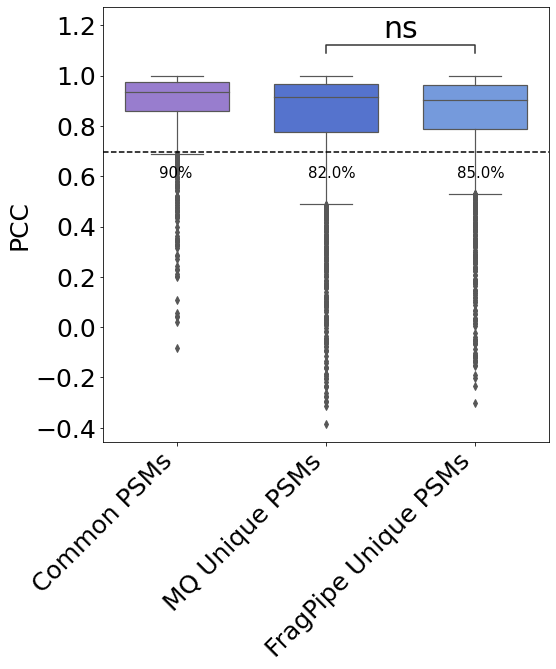

In [10]:
#Figure 5h
plt.figure(1, figsize=(8,8))
x = np.array(['Common PSMs',
              'MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(test['pcc']),len(maxquant['pcc']),len(Michi['pcc'])], axis=0)
d = {'col1': test['pcc'].tolist()+maxquant['pcc'].tolist()+Michi['pcc'].tolist(), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          'MQ Unique PSMs':"royalblue",
                          'FragPipe Unique PSMs':"cornflowerblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
#plt.xlabel('phospho-peptide groups',weight='bold',size=12)
plt.ylabel('PCC',size=25)
plt.xlabel('')
plt.xticks(size=25, rotation=45, ha='right')
plt.yticks(size=25)
#plt.ylim(0,8)
Q=sorted(test['pcc'].tolist())[112]
p_mq=len([q for q in maxquant['pcc'].tolist() if q>Q])/len(maxquant['pcc'].tolist())
p_fp=len([q for q in Michi['pcc'].tolist() if q>Q])/len(Michi['pcc'].tolist())
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.12, Q-0.1,str(90)+'%',size=15)
plt.text(0.88, Q-0.1,str(round(p_mq,2)*100)+'%',size=15)
plt.text(1.88, Q-0.1,str(round(p_fp,2)*100)+'%',size=15)
#plt.text(3.75, Q-0.05,'83.0'+'%',size=15)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("FragPipe Unique PSMs","MQ Unique PSMs")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/Figure5h_PXD015284_prob_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [11]:
d={'all_phospep':Autort_all_phospep,'Autort_predict_phospep':Autort_pre_phospep,
   'all_psm':Autort_all_psm,'Autort_predict_psm':Autort_pre_psm}
df=pd.DataFrame(d)
df.index=['overlap','maxquant','michi']
#df.to_csv('../data/PXD015284/AutoRT_data/figure5_table.csv')

<ipython-input-13-3202dbc77071>:30: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5c_PXD015284_DeltaRT_PSM_barplot.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


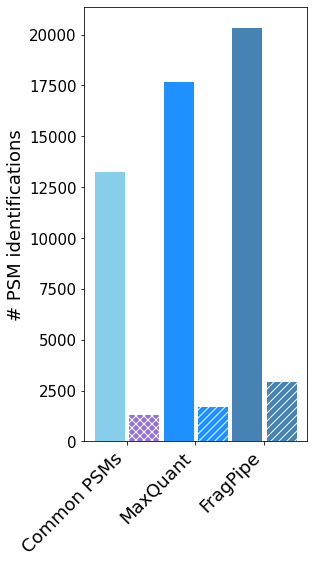

In [13]:
#Figure 5c
# Values of each group
df=pd.read_csv('../data/PXD015284/AutoRT_data/figure5_table.csv',index_col=0)
bars1 = df.all_psm.tolist()
bars2 = df.Autort_predict_psm.tolist()
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,3.5,5.5]
r1 = [1,3,5]
r2 = [4,6]

plt.figure(1, figsize=(4,8))
#ax = plt.axes([0.1, 0.1, 4.2, 8],facecolor='w')

# Names of group and bar width
names = ['Common PSMs','MaxQuant','FragPipe']
barWidth = 0.9

# Create brown bars
plt.bar(r1, bars1, color=['skyblue','dodgerblue','steelblue','royalblue','cornflowerblue'], edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(2, bars2[0], color=['mediumpurple'],hatch='xxx', edgecolor='white', width=barWidth)
plt.bar(r2, bars2[1:], color=['dodgerblue','steelblue','royalblue','cornflowerblue'],hatch='///', edgecolor='white', width=barWidth)
#plt.legend(['all PSMs','test PSMs','unique PSMs'],fontsize=14)
plt.xticks(r, names,size=18,rotation=45,ha='right')
plt.yticks(size=15)
plt.ylabel('# PSM identifications',size=18)
plt.savefig('../plot/Figure5c_PXD015284_DeltaRT_PSM_barplot.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()


In [14]:
#AutoRT results
AutoRT_test_rt = pd.read_table('../data/PXD015284/AutoRT_results/tf_prediction_Nano_PXD015284_exp01_range3_cross1/test.csv')
AutoRT_michi_rt_2 = pd.read_table('../data/PXD015284/AutoRT_results/11_9/tf_prediction_Nano_PXD015284_exp01_range3_cross1_Michi/test.csv')
AutoRT_maxquant_rt = pd.read_table('../data/PXD015284/AutoRT_results/11_9/tf_prediction_Nano_PXD015284_exp01_range3_cross1_MaxQuant/test.csv')
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)


In [15]:
print(np.median(rt))
print(np.median(rt_3))
print(np.median(rt_5))

0.6309079999999998
0.7886199999999981
0.7374349999999907


/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 432x432 with 0 Axes>

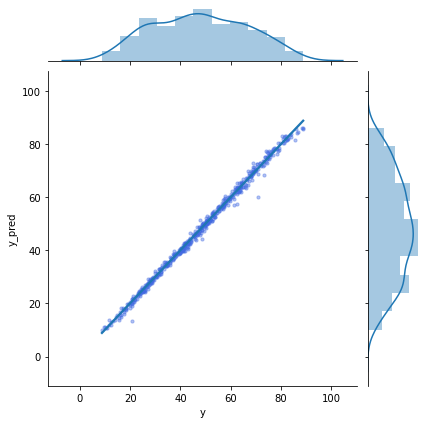

In [16]:
#Figure 5e
plt.figure(1, figsize=(6,6))

g = sns.JointGrid(x=AutoRT_test_rt.y, y=AutoRT_test_rt.y_pred,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
plt.xlabel('RT_observed',size=20)
plt.ylabel('RT_predicted',size=20)
plt.xticks(size=18)
plt.yticks(size=18)
#plt.annotate('Spearman Corr='+str(round(sts.spearmanr(AutoRT_maxquant_rt.y, AutoRT_maxquant_rt.y_pred)[0],4)),(40,90),horizontalalignment='center',size=18)

g = g.plot_marginals(sns.distplot, kde=True)

plt.savefig('../plot/Figure5e_PXD015284_Figure6_scatter.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

<ipython-input-17-8a6ba8f5beba>:31: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5g_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


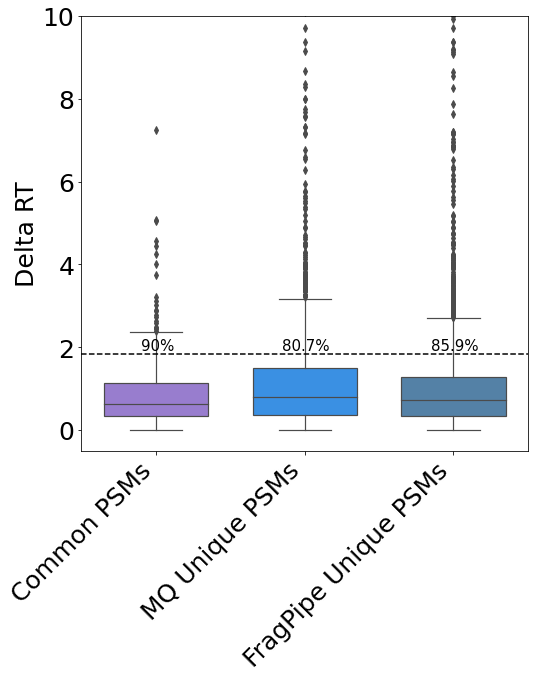

In [17]:
#Figure 5g
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)
plt.figure(1, figsize=(8,8))
g=[rt,rt_3,rt_5]
x = np.array(['Common PSMs','MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(rt),len(rt_3),len(rt_5)], axis=0)
d = {'col1': np.array(pd.concat([rt,rt_3,rt_5])), 'col2': Group}
colors = ['mediumpurple','dodgerblue','steelblue','royalblue','navy']
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          "MQ Unique PSMs": "dodgerblue", 
                          "FragPipe Unique PSMs":"steelblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('')
plt.ylabel('Delta RT',size=25)
plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)
Q=sorted(rt)[504]
p_mq=len([q for q in rt_3 if q<Q])/len(rt_3)
p_fp=len([q for q in rt_5 if q<Q])/len(rt_5)
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.1, Q+0.1,str(90)+'%',size=15)
plt.text(0.85, Q+0.1,str(round(p_mq,3)*100)+'%',size=15)
plt.text(1.85, Q+0.1,str(round(p_fp,3)*100)+'%',size=15)

g.set_ylim(-0.5,10)

plt.savefig('../plot/Figure5g_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [20]:
#PXD007145 MaxQuant results
data_PXD007145 = pd.read_csv('../data/PXD007145/MaxQuant/11_8/msms.txt',sep='\t',index_col=0)
data_PXD007145 = data_PXD007145[data_PXD007145['Reverse']!='+']
#standardized maxquant
data_PXD007145=standardized_maxquant_msms(data_PXD007145)
data_PXD007145_T=data_PXD007145[data_PXD007145.Acceptance=='y']
#PXD015284 Philosopher results, more than MaxQuant
phi_data_PXD007145 = pd.read_csv('../data/PXD007145/Fragpipe/Michi_10_28/psm.tsv',sep='\t')
#Standardized:file name, scannum, peptide(lower), sequence(upper), rt, score
#Michigan
#site prob filter (0.75)
#phospho-pep only
phi_data_PXD007145=standardized_Michi_psm(phi_data_PXD007145)
phi_data_PXD007145_T=phi_data_PXD007145[phi_data_PXD007145['Acceptance']=='y']

In [21]:
#exp+scan+phosphopep
maxquant_zipped=list(zip(data_PXD007145_T.index.tolist(),data_PXD007145_T['scan'].tolist(),data_PXD007145_T['phosphopep'].tolist()))
Michi_zipped_2=list(zip(phi_data_PXD007145_T.index.tolist(),[int(i) for i in phi_data_PXD007145_T.scan.tolist()],phi_data_PXD007145_T.phosphopep.tolist()))

#Overlap PSMs of maxquant and Michi
overlap=set(maxquant_zipped).intersection(set(Michi_zipped_2))
len(overlap)

1485

<ipython-input-22-b528fac8e07a>:36: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5c_PXD007145_unlocalized_proportion.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


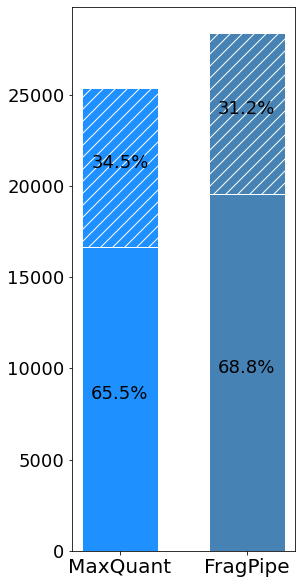

In [22]:
pep=[len(set(data_PXD007145_T.phosphopep)),len(set(data_PXD007145.phosphopep)),
     len(set(phi_data_PXD007145_T.phosphopep)),len(set(phi_data_PXD007145.phosphopep))]
# Values of each group
bars1 = [pep[1]-pep[0],pep[3]-pep[2]]
bars2 = [pep[0],pep[2]]
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,2.5]
r1 = [1,3]
r2 = [2,4]

plt.figure(1, figsize=(4,10))
#ax = plt.axes([0.1, 0.1, 4.2, 8],facecolor='w')

# Names of group and bar width
names = ['MaxQuant','FragPipe']
barWidth = 0.6

plt.bar(r, bars2, color=['dodgerblue','steelblue','royalblue','cornflowerblue'], edgecolor='white', width=barWidth)

plt.bar(r, bars1, bottom=bars2, color=['dodgerblue','steelblue','royalblue','cornflowerblue'],hatch='//', edgecolor='white', width=barWidth)

plt.xticks(r, names,size=20,ha='center')
plt.yticks(size=18)

c=['black','black','black','black']
for i in range(0,2):
    value=round(bars1[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars1[i]/2+bars2[i]),horizontalalignment='center',size=18,color=c[i])
for i in range(0,2):
    value=round(bars2[i]/(bars1[i]+bars2[i])*100,1)
    plt.annotate(str(value)+'%',(r[i],bars2[i]/2),horizontalalignment='center',
                 size=18,color=c[i])
plt.savefig('../plot/Figure5c_PXD007145_unlocalized_proportion.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
plt.show()



In [9]:
#only maxquant
maxquant_only=[]
for i in maxquant_zipped:
    if (i not in Michi_zipped_2):
        maxquant_only.append(i)
Michi_only_2=[]
for i in Michi_zipped_2:
    if  (i not in maxquant_zipped):
        Michi_only_2.append(i)

In [10]:
overlap_Autort=pd.read_pickle('../data/PXD007145/AutoRT_data/overlap_Autort.pkl')
phosphopep_autoRT=overlap_Autort.phosphopep.tolist()
# maxquant_Autort.to_pickle(path+'/overlap_Autort.pkl')
seq_upper=[]
for i in phosphopep_autoRT:
    seq=i.replace('m','M')
    seq=seq.replace('s','S')
    seq=seq.replace('t','T')
    seq=seq.replace('y','Y')
    seq_upper.append(seq)

In [34]:
# data=pd.read_csv('../data/PXD007145/AutoRT_data/MaxQuant_Michi_2_noseqoverlap_train_1.tsv',sep='\t')
# pep=[]
# rt=[]
# for i in range(len(data)):
#     if len(data.x.iloc[i])<=48:
#         pep.append(data.x.iloc[i])
#         rt.append(data.y.iloc[i])
# outputStr = ''
# for z in range(len(pep)): 
#     outputStr += str(pep[z]) + "\t" + str(rt[z]) +'\n'
# file='../data/PXD007145/AutoRT_data/train/MaxQuant_Michi_2_noseqoverlap_train_1.tsv'
# with open(file, "w") as outputter:
#     outputter.write('x'+"\t"+'y'+'\n')
#     outputter.write(outputStr)

In [32]:
prepare_MQ_vali_AutoRT(data_PXD007145_T,'../data/PXD007145/AutoRT_data')

156
212
213
214
215
216
263
402
628
629
669
670
799
800
811
826
827
828
829
834
911
993
994
995
996
1010
1036
1037
1055
1056
1057
1060
1061
1090
1091
1092
1093
1094
1141
1142
1143
1144
1145
1146
1278
1292
1293
1302
1384
1402
1467
1468
1469
1471
1568
1572
1573
1574
1575
1576
1614
1615
1616
1664
1678
1686
1695
1726
1733
1765
1766
1767
1768
1769
1770
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1882
1883
1898
2079
2178
2179
2239
2240
2399
2400
2410
2424
2519
2558
2559
2586
2593
2701
2702
2748
2880
2980
2990
3147
3181
3198
3199
3200
3212
3213
3299
3321
3326
3331
3401
3402
3403
3404
3405
3406
3407
3421
3422
3423
3440
3441
3442
3443
3535
3619
3635
3651
3652
3664
3665
3666
3683
3684
3691
3718
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3820
3873
3874
3910
3922
3949
4090
4091
4096
4099
4100
4196
4228
4303
4304
4305
4306
4307
4313
4335
4336
4378
4379
4380
4418
4419
4426
4427
4436
4446
4447
4448
4449
4491
4501
4527
4545
4546
4550
4612
4638
4655
4656
4657
4664
4665
4666
4710


28436
28437
28438
28527
28528
28529
28530
28531
28561
28562
28563
28576
28577
28578
28631
28712
28713
28714
28715
28716
28717
28732
28733
28740
28741
28742
28743
28744
28749
28750
28751
28752
28753
28759
28760
28761
28764
28765
28766
28767
28768
28769
28811
28975
28976
29025
29026
29097
29098
29099
29110
29111
29112
29170
29171
29174
29175
29176
29251
29282
29283
29284
29285
29290
29291
29293
29294
29295
29334
29373
29374
29410
29476
29479
29480
29722
29742
29743
29744
29748
29749
29750
29803
29804
29805
29806
29807
29810
29854
29855
29859
29860
29861
29862
29895
29896
29933
29934
29935
29965
29966
30008
30081
30082
30083
30105
30106
30107
30112
30129
30135
30163
30164
30165
30166
30222
30280
30281
30282
30286
30287
30308
30313
30501
30502
30503
30506
30553
30614
30657
30658
30705
30721
30730
30744
30745
30847
30877
30985
30986
30987
31024
31055
31174
31198
31254
31255
31268
31269
31276
31285
31286
31287
31292
31293
31294
31300
31322
31372
31387
31404
31407
31408
31433
31434
31494
3149

51286
51287
51336
51337
51357
51358
51381
51462
51463
51464
51465
51466
51515
51516
51560
51699
51700
51701
51707
51714
51781
51790
51797
51800
51801
51805
51806
51807
51808
51937
51945
52027
52028
52030
52033
52078
52079
52080
52092
52105
52140
52141
52142
52147
52148
52149
52150
52202
52237
52238
52246
52259
52271
52272
52305
52465
52466
52467
52468
52469
52480
52503
52504
52505
52520
52521
52524
52525
52557
52566
52567
52568
52602
52603
52608
52609
52610
52693
52737
52738
52739
52757
52758
52770
52774
52858
52863
52864
52870
52906
52907
52915
52931
52940
52941
53001
53002
53010
53040
53042
53057
53236
53237
53245
53246
53258
53259
53300
53315
53316
53317
53353
53357
53423
53479
53637
53638
53639
53640
53667
53668
53669
53686
53693
53701
53702
53703
53704
53783
53824
53830
53831
53832
53833
53834
53853
53854
53855
53860
53884
53885
53889
53890
53891
53892
53893
53897
53907
53908
53909
53938
53939
53940


In [18]:
prepare_phi_vali_AutoRT(phi_data_PXD007145_T,'../data/PXD007145/AutoRT_data')

5
13
19
38
89
108
121
130
133
135
153
156
168
170
181
184
204
209
229
234
266
279
286
288
289
290
293
295
305
308
311
312
332
333
364
365
395
405
421
422
424
426
428
453
455
464
466
468
496
502
505
514
520
521
528
530
539
540
541
544
612
626
639
693
743
762
778
809
835
836
864
869
873
888
898
903
913
922
926
931
938
949
970
972
993
1053
1087
1099
1102
1118
1120
1129
1136
1178
1214
1234
1236
1260
1262
1290
1295
1316
1317
1340
1342
1344
1354
1371
1373
1374
1377
1378
1379
1384
1386
1392
1399
1401
1406
1440
1499
1509
1520
1529
1530
1537
1543
1547
1561
1567
1572
1577
1578
1583
1593
1613
1617
1645
1646
1675
1713
1717
1749
1753
1760
1776
1777
1788
1797
1814
1818
1838
1882
1890
1891
1905
1921
1922
1938
1967
1996
2007
2078
2100
2120
2134
2159
2184
2193
2194
2218
2229
2232
2235
2238
2248
2276
2296
2310
2314
2318
2330
2340
2370
2381
2393
2417
2426
2448
2457
2496
2497
2506
2507
2521
2565
2576
2649
2664
2680
2682
2694
2702
2715
2755
2765
2770
2796
2818
2829
2832
2857
2858
2864
2877
2885
2893
2938
2

19456
19463
19464
19475
19499
19509
19511
19523
19539
19542
19551
19552
19570
19573
19583
19586
19598
19600
19604
19619
19627
19630
19647
19654
19670
19678
19680
19694
19715
19719
19728
19745
19767
19778
19801
19813
19816
19824
19826
19832
19843
19852
19858
19887
19888
19889
19913
19915
19922
19929
19934
19941
19967
19991
19992
19995
20006
20011
20014
20018
20031
20055
20060
20063
20066
20071
20076
20077
20087
20092
20095
20099
20103
20107
20115
20116
20117
20119
20126
20151
20156
20167
20175
20180
20187
20206
20210
20219
20225
20229
20237
20239
20245
20250
20263
20264
20265
20266
20267
20269
20280
20285
20294
20300
20305
20307
20308
20316
20318
20321
20322
20334
20345
20357
20370
20374
20377
20378
20380
20398
20424
20440
20443
20448
20458
20461
20472
20483
20486
20492
20497
20503
20504
20507
20514
20516
20530
20531
20543
20550
20553
20564
20568
20572
20574
20583
20612
20621
20624
20630
20636
20648
20667
20669
20700
20714
20722
20724
20738
20768
20771
20786
20789
20797
20800
20814
2081

35082
35104
35125
35147
35157
35159
35184
35188
35190
35195
35212
35214
35218
35236
35237
35242
35253
35254
35256
35292
35294
35310
35330
35333
35335
35340
35342
35346
35352
35355
35361
35370
35382
35388
35408
35414
35446
35461
35473
35476
35479
35492
35499
35500
35515
35552
35568
35577
35580
35585
35602
35640
35641
35649
35653
35657
35708
35712
35729
35751
35757
35766
35770
35792
35797
35798
35805
35815
35820
35822
35829
35836
35837
35844
35855
35856
35862
35863
35870
35875
35878
35881
35889
35904
35911
35917
35920
35944
35945
35948
35950
35957
35958
35971
35996
35998
36006
36042
36047
36050
36054
36055
36060
36068
36070
36076
36077
36088
36103
36105
36116
36119
36120
36148
36149
36150
36157
36158
36166
36167
36173
36174
36184
36185
36188
36189
36205
36213
36248
36251
36278
36279
36285
36305
36307
36327
36329
36334
36336
36342
36343
36365
36375
36386
36393
36399
36413
36428
36439
36448
36476
36479
36491
36516
36537
36541
36551
36558
36572
36578
36579
36601
36605
36629
36651
36658
3666

46723
46728
46737
46740
46745
46748
46755
46760
46764
46765
46772
46800
46807
46811
46816
46820
46830
46837
46843
46844
46847
46850
46855
46861
46863
46866
46870
46879
46885
46887
46888
46892
46899
46903
46907
46919
46923
46926
46927
46939
46940
46949
46952
46956
46957
46967
46968
46972
46973
46974
46977
46980
46984
46989
46990
46993
46994
46999
47006
47015
47017
47020
47033
47039
47048
47054
47059
47061
47077
47083
47085
47100
47101
47108
47112
47113
47114
47128
47146
47148
47153
47155
47156
47158
47160
47161
47165
47167
47168
47175
47176
47184
47185
47192
47196
47197
47199
47203
47204
47206
47210
47221
47222
47227
47252
47253
47254
47256
47263
47265
47269
47271
47275
47287
47297
47301
47306
47310
47311
47312
47318
47320
47331
47333
47335
47337
47343
47344
47345
47356
47357
47358
47361
47366
47370
47373
47379
47383
47390
47392
47403
47407
47421
47422
47428
47434
47435
47441
47442
47443
47451
47455
47474
47481
47486
47488
47489
47490
47495
47502
47512
47513
47514
47516
47517
47519
4752

63680
63685
63698
63713
63723
63755
63789
63791
63796
63816
63861
63872
63884
63886
63893
63897
63930
63941
63944
63953
63966
63967
63969
63973
64015
64016
64042
64043
64049
64051
64091
64094
64098
64115
64123
64127
64179
64183
64188
64192
64239
64243
64253
64260
64264
64267
64294
64306
64312
64363
64364
64368
64381
64389
64391
64414
64426
64429
64433
64439
64443
64444
64454
64480
64482
64484
64512
64521
64525
64529
64545
64571
64585
64600
64602
64605
64606
64609
64614
64616
64653
64656
64661
64682
64683
64694
64698
64720
64723
64727
64731
64733
64735
64742
64747
64753
64759
64764
64784
64805
64806
64813
64826
64833
64861
64886
64899
64907
64914
64919
64920
64925
64938
64944
64956
65003
65020
65060
65120
65128
65130
65156
65157
65176
65193
65207
65216
65226
65229
65236
65240
65250
65260
65266
65270
65281
65283
65310
65319
65321
65336
65342
65345
65347
65377
65410
65433
65435
65437
65439
65443
65462
65468
65471
65477
65485
65490
65509
65510
65518
65542
65561
65567
65577
65584
65585
6559

In [23]:
maxquant_Autort=pd.read_pickle('../data/PXD007145/AutoRT_data/maxquant_Autort.pkl')
Michi_Autort=pd.read_pickle('../data/PXD007145/AutoRT_data/michi_Autort.pkl')
overlap_Autort=pd.read_pickle('../data/PXD007145/AutoRT_data/overlap_Autort.pkl')
#exp+scan+phosphopep
maxquant_zipped_autort=list(zip(maxquant_Autort.index.tolist(),maxquant_Autort['scan'].tolist(),maxquant_Autort['phosphopep'].tolist()))
Michi_zipped_2_autort=list(zip(Michi_Autort.index.tolist(),Michi_Autort.scan.tolist(),Michi_Autort.phosphopep.tolist()))
overlap_zipped_autort=list(zip(overlap_Autort.index.tolist(),overlap_Autort.scan.tolist(),overlap_Autort.phosphopep.tolist()))
michi_2=pd.read_table('../data/PXD007145/AutoRT_data/Michi_prediction_2.tsv')
phosphopep_michi_2=list(michi_2.x)
maxquant=pd.read_table('../data/PXD007145/AutoRT_data/MaxQuant_prediction.tsv')
phosphopep_maxquant=list(maxquant.x)
train1 = pd.read_table('../data/PXD007145/AutoRT_data/train/MaxQuant_Michi_2_noseqoverlap_train_1.tsv')
test1=pd.read_table('../data/PXD007145/AutoRT_data/train/MaxQuant_Michi_2_noseqoverlap_validation_1.tsv')
phosphopep_overlap=list(train1.x)+list(test1.x)
#localized all
Autort_all_phospep=[len(set(overlap_Autort.phosphopep)),len(set(data_PXD007145_T.phosphopep)),
                    len(set(phi_data_PXD007145_T.phosphopep))]
Autort_all_psm=[len(set(overlap_zipped_autort)),(len(set(maxquant_zipped))),(len(set(Michi_zipped_2)))]
#Only & <48aa
Autort_pre_phospep=[len(set(test1.x)),len(set(phosphopep_maxquant)), len(set(phosphopep_michi_2))]
Autort_pre_psm=[int(len(set(overlap_zipped_autort))/10),(len(set(maxquant_zipped_autort))),(len(set(Michi_zipped_2_autort)))]

In [24]:
data=pd.read_csv('../data/PXD007145/AutoRT_data/MaxQuant_Michi_2_noseqoverlap_train_1.tsv',sep='\t')
seq_upper=[]
for i in range(len(data)):
    seq=data.x.iloc[i]
    seq=seq.replace('1','M')
    seq=seq.replace('2','S')
    seq=seq.replace('3','T')
    seq=seq.replace('4','Y')
    seq_upper.append(seq)
seq_upper=list(set(seq_upper))
train_index=[]
test_index=[]
for i in range(len(overlap_Autort)):
    if overlap_Autort.sequence.iloc[i] in seq_upper:
        train_index.append(i)
    else:
        test_index.append(i)
overlap_Autort_train=overlap_Autort.iloc[train_index]
overlap_Autort_test=overlap_Autort.iloc[test_index]

In [50]:
#Change the saving path
data=[maxquant_Autort,Michi_Autort,overlap_Autort_train,overlap_Autort_test]
name=['MaxQuant','Michi','overlap_train','overlap_test']
for i in range(0,4):
    convert_to_psmtxt(data[i],name[i])

In [25]:
test = pd.read_table('../data/PXD007145/pDeep2_results/PXD007145/overlap-mod-pcc.txt',header=0)
test=test.dropna()
maxquant = pd.read_table('../data/PXD007145/pDeep2_results/PXD007145/maxquant-mod-pcc.txt',header=0)
maxquant=maxquant.dropna()
Michi = pd.read_table('../data/PXD007145/pDeep2_results/PXD007145/Michi-mod-pcc.txt',header=0)
Michi=Michi.dropna()

In [26]:
print(np.median(test['pcc']))
print(np.median(maxquant['pcc']))
print(np.median(Michi['pcc']))
Q=sorted(test['pcc'].tolist())[302]
print(Q)

0.96426773
0.9494384
0.94090767
0.88967276


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MQ Unique PSMs v.s. FragPipe Unique PSMs: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.813e-06 U_stat=7.892e+06


<ipython-input-27-52712a7dc254>:31: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5h_PXD007145_prob_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


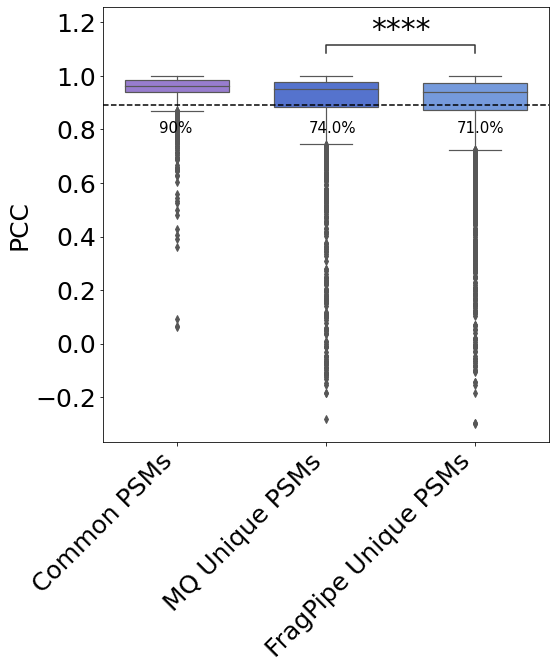

In [27]:
#Figure 5h
plt.figure(1, figsize=(8,8))
x = np.array(['Common PSMs',
              'MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(test['pcc']),len(maxquant['pcc']),len(Michi['pcc'])], axis=0)
d = {'col1': test['pcc'].tolist()+maxquant['pcc'].tolist()+Michi['pcc'].tolist(), 'col2': Group}
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          'MQ Unique PSMs':"royalblue",
                          'FragPipe Unique PSMs':"cornflowerblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
#plt.xlabel('phospho-peptide groups',weight='bold',size=12)
plt.ylabel('PCC',size=25)
plt.xlabel('')
plt.xticks(size=25, rotation=45, ha='right')
plt.yticks(size=25)
#plt.ylim(0,8)
Q=sorted(test['pcc'].tolist())[302]
p_mq=len([q for q in maxquant['pcc'].tolist() if q>Q])/len(maxquant['pcc'].tolist())
p_fp=len([q for q in Michi['pcc'].tolist() if q>Q])/len(Michi['pcc'].tolist())
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.12, Q-0.1,str(90)+'%',size=15)
plt.text(0.88, Q-0.1,str(round(p_mq,2)*100)+'%',size=15)
plt.text(1.88, Q-0.1,str(round(p_fp,2)*100)+'%',size=15)
#plt.text(3.75, Q-0.05,'83.0'+'%',size=15)
test_results = add_stat_annotation(g, data=df, x='col2', y='col1',
                                   box_pairs=[("FragPipe Unique PSMs","MQ Unique PSMs")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='inside', verbose=2,fontsize=30)
plt.savefig('../plot/Figure5h_PXD007145_prob_boxplot_PCC.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [28]:
d={'all_phospep':Autort_all_phospep,'Autort_predict_phospep':Autort_pre_phospep,
   'all_psm':Autort_all_psm,'Autort_predict_psm':Autort_pre_psm}
df=pd.DataFrame(d)
df.index=['overlap','maxquant','michi']
#df.to_csv('../data/PXD007145/AutoRT_data/figure5_table.csv')

<ipython-input-29-a180082db682>:31: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5d_PXD00714_PXD007145_DeltaRT_PSM_barplot.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


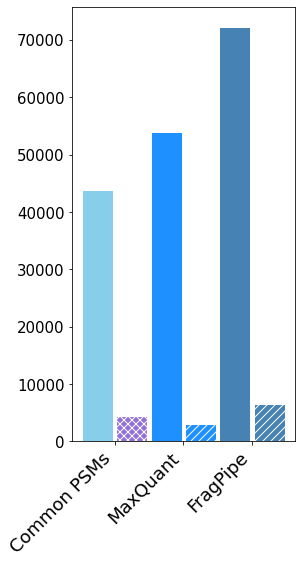

In [29]:
#Figure 5d
# Values of each group
df=pd.read_csv('../data/PXD007145/AutoRT_data/figure5_table.csv',index_col=0)
bars1 = df.all_psm.tolist()
bars2 = df.Autort_predict_psm.tolist()
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [1.5,3.5,5.5]
r1 = [1,3,5]
r2 = [4,6]

plt.figure(1, figsize=(4,8))
#ax = plt.axes([0.1, 0.1, 4.2, 8],facecolor='w')

# Names of group and bar width
names = ['Common PSMs','MaxQuant','FragPipe']
barWidth = 0.9

# Create brown bars
# plt.title('Human_LFQ',size=12)
plt.bar(r1, bars1, color=['skyblue','dodgerblue','steelblue','royalblue','cornflowerblue'], edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(2, bars2[0], color=['mediumpurple'],hatch='xxx', edgecolor='white', width=barWidth)
plt.bar(r2, bars2[1:], color=['dodgerblue','steelblue','royalblue','cornflowerblue'],hatch='///', edgecolor='white', width=barWidth)
#plt.legend(['all PSMs','test PSMs','unique PSMs'],fontsize=14)
plt.xticks(r, names,size=18,rotation=45,ha='right')
plt.yticks(size=15)
# plt.ylabel('PSM identifications',size=12,weight='bold')
plt.savefig('../plot/Figure5d_PXD00714_PXD007145_DeltaRT_PSM_barplot.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()




In [30]:
#AutoRT results
AutoRT_test_rt = pd.read_table('../data/PXD007145/AutoRT_results/human_PXD007145/tf_prediction_Nano_PXD007145_exp01_range3_cross1/test.csv')
AutoRT_michi_rt_2 = pd.read_table('../data/PXD007145/AutoRT_results/human_PXD007145/tf_prediction_Nano_PXD007145_exp01_range3_cross1_Michi/test.csv')
AutoRT_maxquant_rt = pd.read_table('../data/PXD007145/AutoRT_results/human_PXD007145/tf_prediction_Nano_PXD007145_exp01_range3_cross1_MaxQuant/test.csv')
rt = abs(AutoRT_test_rt.y - AutoRT_test_rt.y_pred)
rt_3 = abs(AutoRT_maxquant_rt.y - AutoRT_maxquant_rt.y_pred)
rt_5 = abs(AutoRT_michi_rt_2.y - AutoRT_michi_rt_2.y_pred)

In [31]:
print(np.median(rt))
print(np.median(rt_3))
print(np.median(rt_5))

1.4526326190476482
2.993272000000008
2.776084166666692


/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jiangwen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarn

<Figure size 432x432 with 0 Axes>

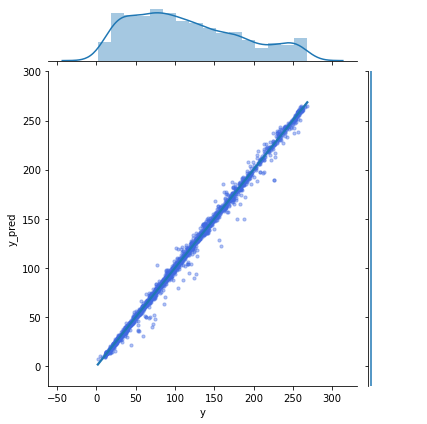

In [33]:
#Figure 5f
plt.figure(1, figsize=(6,6))
g = sns.JointGrid(x=AutoRT_test_rt.y, y=AutoRT_test_rt.y_pred,space=0.2)
g = g.plot_joint(sns.regplot,fit_reg=True, scatter_kws={"color":"royalblue","alpha":0.4,"s":10})
plt.xlabel('RT_observed',size=20)
plt.ylabel('RT_predicted',size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlim(-20,300)
plt.ylim(-20,300)
#plt.annotate('Spearman Corr='+str(round(sts.spearmanr(AutoRT_maxquant_rt.y, AutoRT_maxquant_rt.y_pred)[0],4)),(120,260),horizontalalignment='center',size=18)

g = g.plot_marginals(sns.distplot, kde=True)

plt.savefig('../plot/Figure5f_PXD007145_scatter.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()

In [11]:
len(rt)*0.9

1762.2

In [12]:
sorted(rt)[1762]

5.308330000000012

<ipython-input-34-bbbc97721838>:27: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  plt.savefig('../plot/Figure5g_PXD007145_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')


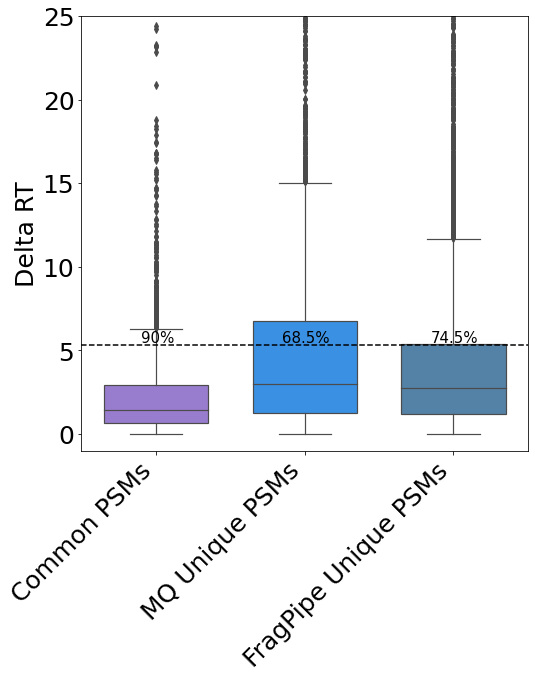

In [34]:
#Figure 5g
plt.figure(1, figsize=(8,8))
g=[rt,rt_3,rt_5]
x = np.array(['Common PSMs','MQ Unique PSMs','FragPipe Unique PSMs'])
Group = np.repeat(x, [len(rt),len(rt_3),len(rt_5)], axis=0)
d = {'col1': np.array(pd.concat([rt,rt_3,rt_5])), 'col2': Group}
colors = ['mediumpurple','dodgerblue','steelblue','royalblue','navy']
df = pd.DataFrame(data=d)
my_pal = {"Common PSMs": "mediumpurple", 
                          "MQ Unique PSMs": "dodgerblue", 
                          "FragPipe Unique PSMs":"steelblue"}
g = sns.boxplot(data=df, x='col2', y='col1',
                   palette=my_pal,linewidth=1.2,width=0.7)
plt.xlabel('')
plt.ylabel('Delta RT',size=25)
plt.xticks(size=25,rotation=45,ha='right')
plt.yticks(size=25)

g.set_ylim(-1,25)
Q=sorted(rt)[1762]
p_mq=len([q for q in rt_3 if q<Q])/len(rt_3)
p_fp=len([q for q in rt_5 if q<Q])/len(rt_5)
plt.axhline(y=Q, color='black', linestyle='--')
plt.text(-0.1, Q+0.2,str(90)+'%',size=15)
plt.text(0.85, Q+0.2,str(round(p_mq,3)*100)+'%',size=15)
plt.text(1.85, Q+0.2,str(round(p_fp,3)*100)+'%',size=15)
plt.savefig('../plot/Figure5g_PXD007145_DeltaRT_boxplot_zoom.jpeg',bbox_inches='tight',dpi=300,pad_inches=0.1,optimize=True,orientation='portrait')
# Show graphic
plt.show()